# Problem Statement


You have to analyze 2 decades of the Nifty 50 index in the Indian Stock Market and come up with strategies to invest for higher returns in the future.<br> <br> 

**Objective:**
Your objective is to analyze the data and come up with strategies to build a portfolio that will bring the maximum yield.<br> 

**Tasks to be Performed:**
1. Analyze the indicators in the dataset that best explain the volatility and unpredictable nature of the stocks in the last decade.<br> 
2. Choose promising stock based on your analysis for your portfolio<br> 
3. Build a dashboard where you can analyze the performance of the stocks<br> 
4. Feature engineer and build machine learning solutions for the business<br> 
**Requirements.** <br> 

# Import Libraries 

In [ ]:
pip install dash #install dash

In [ ]:
pip show dash

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import dash
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
NIFTY50=pd.read_csv('NIFTY50_all.csv') # load the stock data 

In [4]:
NIFTY50 # visualize the data records

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


# Data Processing

In [5]:
NIFTY50.duplicated().sum() # check for duplicates

0

In [6]:
NIFTY50.isnull().sum() # check for null data 

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [7]:
NIFTY50.drop(columns = 'Trades', inplace = True) # Trades column with so many null values 

In [8]:
NIFTY50.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
NIFTY50.isnull().sum() # check for null data again

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume    16077
%Deliverble           16077
dtype: int64

In [10]:
NIFTY50 = NIFTY50.copy()  # Ensures you're working with the main DataFrame, so make a copy
# Fill NaN values in Deliverable Volume and %Deliverble with 0
columns_to_fill = ['Deliverable Volume', '%Deliverble']
NIFTY50[columns_to_fill] = NIFTY50[columns_to_fill].fillna(0)

In [11]:
NIFTY50.isnull().sum() # check for null data 

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
# check percentage of Deliverable volume and Deliverable data which is 6.8%. the percentage is small so i will fill 
16077/235192*100


6.835691690193545

In [ ]:
114848/235192*100 # this has so much percentage of null data , so i will drop this column 

48.83159291132351

In [12]:
NIFTY50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Deliverable Volume  235192 non-null  float64
 13  %Deliverble         235192 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 25.1+ MB


In [13]:
NIFTY50.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,2.351920e+05,235192.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,1.225202e+06,0.468614
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,2.753250e+06,0.223051
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,0.000000e+00,0.000000
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,7.775075e+04,0.324000
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.261440e+05,0.492000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,1.336903e+06,0.628400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,2.325307e+08,1.000000


In [14]:
NIFTY50_copy= NIFTY50.copy()

In [16]:
# Symbol mappings
data = {
    "Symbol": [
        "MUNDRAPORT", "UTIBANK", "BHARTI", "HEROHONDA", "HINDALC0",
        "HINDLEVER", "JSWSTL", "KOTAKMAH", "TELCO", "INFOSYSTCH",
        "TISCO", "UNIPHOS", "SESAGOA", "ZEETELE", "SSLT"
    ],
    "Replace_with": [
        "ADANIPORTS", "AXISBANK", "BHARTIARTL", "HEROMOTOCO", "HINDALCO",
        "HINDUNILVR", "JSWSTEEL", "KOTAKBANK", "TATAMOTORS", "INFY",
        "TATASTEEL", "UPL", "VEDL", "ZEEL", "VEDL"
    ]
}

mapping_df = pd.DataFrame(data)

# Create a mapping dictionary
replace_mapping = dict(zip(mapping_df["Symbol"], mapping_df["Replace_with"]))

# Replace items in the 'Symbol' column of the stocks_df DataFrame
NIFTY50["Symbol"] = NIFTY50["Symbol"].replace(replace_mapping)

NIFTY50


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,2744472.0,0.2894


In [17]:
NIFTY50["Symbol"].nunique() #Now there are 50 unique symbols 


50

In [18]:
# Add company Name, Industry and ISIN Code to each symbol 

# Provided data for mapping
data = {
    "Symbol": [
        "ADANIPORTS", "ASIANPAINT", "AXISBANK", "BAJAJ-AUTO", "BAJAJFINSV", "BAJFINANCE",
        "BHARTIARTL", "BPCL", "BRITANNIA", "CIPLA", "COALINDIA", "DRREDDY", "EICHERMOT",
        "GAIL", "GRASIM", "HCLTECH", "HDFC", "HDFCBANK", "HEROMOTOCO", "HINDALCO",
        "HINDUNILVR", "ICICIBANK", "INDUSINDBK", "INFRATEL", "INFY", "IOC", "ITC",
        "JSWSTEEL", "KOTAKBANK", "LT", "M&M", "MARUTI", "NESTLEIND", "NTPC", "ONGC",
        "POWERGRID", "RELIANCE", "SBIN", "SHREECEM", "SUNPHARMA", "TATAMOTORS",
        "TATASTEEL", "TCS", "TECHM", "TITAN", "ULTRACEMCO", "UPL", "VEDL", "WIPRO", "ZEEL"
    ],
    "Company Name": [
        "Adani Ports and Special Economic Zone Ltd.", "Asian Paints Ltd.", "Axis Bank Ltd.",
        "Bajaj Auto Ltd.", "Bajaj Finserv Ltd.", "Bajaj Finance Ltd.", "Bharti Airtel Ltd.",
        "Bharat Petroleum Corporation Ltd.", "Britannia Industries Ltd.", "Cipla Ltd.",
        "Coal India Ltd.", "Dr. Reddy's Laboratories Ltd.", "Eicher Motors Ltd.",
        "GAIL (India) Ltd.", "Grasim Industries Ltd.", "HCL Technologies Ltd.",
        "Housing Development Finance Corporation Ltd.", "HDFC Bank Ltd.", "Hero MotoCorp Ltd.",
        "Hindalco Industries Ltd.", "Hindustan Unilever Ltd.", "ICICI Bank Ltd.",
        "IndusInd Bank Ltd.", "Bharti Infratel Ltd.", "Infosys Ltd.", "Indian Oil Corporation Ltd.",
        "ITC Ltd.", "JSW Steel Ltd.", "Kotak Mahindra Bank Ltd.", "Larsen & Toubro Ltd.",
        "Mahindra & Mahindra Ltd.", "Maruti Suzuki India Ltd.", "Nestle India Ltd.", "NTPC Ltd.",
        "Oil & Natural Gas Corporation Ltd.", "Power Grid Corporation of India Ltd.",
        "Reliance Industries Ltd.", "State Bank of India", "Shree Cement Ltd.",
        "Sun Pharmaceutical Industries Ltd.", "Tata Motors Ltd.", "Tata Steel Ltd.",
        "Tata Consultancy Services Ltd.", "Tech Mahindra Ltd.", "Titan Company Ltd.",
        "UltraTech Cement Ltd.", "UPL Ltd.", "Vedanta Ltd.", "Wipro Ltd.",
        "Zee Entertainment Enterprises Ltd."
    ],
    "Industry": [
        "SERVICES", "CONSUMER GOODS", "FINANCIAL SERVICES", "AUTOMOBILE", "FINANCIAL SERVICES",
        "FINANCIAL SERVICES", "TELECOM", "ENERGY", "CONSUMER GOODS", "PHARMA", "METALS", "PHARMA",
        "AUTOMOBILE", "ENERGY", "CEMENT & CEMENT PRODUCTS", "IT", "FINANCIAL SERVICES",
        "FINANCIAL SERVICES", "AUTOMOBILE", "METALS", "CONSUMER GOODS", "FINANCIAL SERVICES",
        "FINANCIAL SERVICES", "TELECOM", "IT", "ENERGY", "CONSUMER GOODS", "METALS",
        "FINANCIAL SERVICES", "CONSTRUCTION", "AUTOMOBILE", "AUTOMOBILE", "CONSUMER GOODS",
        "ENERGY", "ENERGY", "ENERGY", "ENERGY", "FINANCIAL SERVICES", "CEMENT & CEMENT PRODUCTS",
        "PHARMA", "AUTOMOBILE", "METALS", "IT", "IT", "CONSUMER GOODS", "CEMENT & CEMENT PRODUCTS",
        "FERTILISERS & PESTICIDES", "METALS", "IT", "MEDIA & ENTERTAINMENT"
    ],
    "ISIN Code": [
        "INE742F01042", "INE021A01026", "INE238A01034", "INE917I01010", "INE918I01018",
        "INE296A01024", "INE397D01024", "INE029A01011", "INE216A01030", "INE059A01026",
        "INE522F01014", "INE089A01023", "INE066A01013", "INE129A01019", "INE047A01021",
        "INE860A01027", "INE001A01036", "INE040A01034", "INE158A01026", "INE038A01020",
        "INE030A01027", "INE090A01021", "INE095A01012", "INE121J01017", "INE009A01021",
        "INE242A01010", "INE154A01025", "INE019A01038", "INE237A01028", "INE018A01030",
        "INE101A01026", "INE585B01010", "INE239A01016", "INE733E01010", "INE213A01029",
        "INE752E01010", "INE002A01018", "INE062A01020", "INE070A01015", "INE044A01036",
        "INE155A01022", "INE081A01012", "INE467B01029", "INE669C01036", "INE280A01028",
        "INE481G01011", "INE628A01036", "INE205A01025", "INE075A01022", "INE256A01028"
    ]
}

# Convert the provided data to a DataFrame
mapping_df = pd.DataFrame(data)

# Merge the two DataFrames to add the new columns
NIFTY50 = NIFTY50.merge(mapping_df, on="Symbol", how="left")

NIFTY50


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,9859619.0,0.3612,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,1453278.0,0.3172,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,1069678.0,0.2088,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,1260913.0,0.2735,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,816123.0,0.2741,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,2340188.0,0.2739,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,5425957.0,0.3808,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,2413974.0,0.2864,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,2744472.0,0.2894,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028


In [15]:
NIFTY50["Symbol"].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJAUTOFIN', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC',
       'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM',
       'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN',
       'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'], dtype=object)

In [16]:
NIFTY50["Symbol"].nunique()

50

# EDA

In [19]:
# Adding useful columns
NIFTY50['Daily Change'] = NIFTY50['Close'] - NIFTY50['Prev Close']
NIFTY50['Daily % Change'] = (NIFTY50['Daily Change'] / NIFTY50['Prev Close']) * 100
NIFTY50['High-Low Spread'] = NIFTY50['High'] - NIFTY50['Low']

In [20]:
NIFTY50

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code,Daily Change,Daily % Change,High-Low Spread
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,9859619.0,0.3612,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042,522.90,118.840909,280.00
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,1453278.0,0.3172,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042,-69.00,-7.165853,116.00
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,1069678.0,0.2088,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042,-9.70,-1.085133,73.75
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,1260913.0,0.2735,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042,37.35,4.224157,68.00
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,816123.0,0.2741,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042,47.75,5.181488,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,2340188.0,0.2739,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028,-1.60,-0.851064,6.00
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,5425957.0,0.3808,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028,1.75,0.938841,6.15
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,2413974.0,0.2864,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028,0.95,0.504916,3.50
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,2744472.0,0.2894,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,INE256A01028,-2.55,-1.348493,5.65


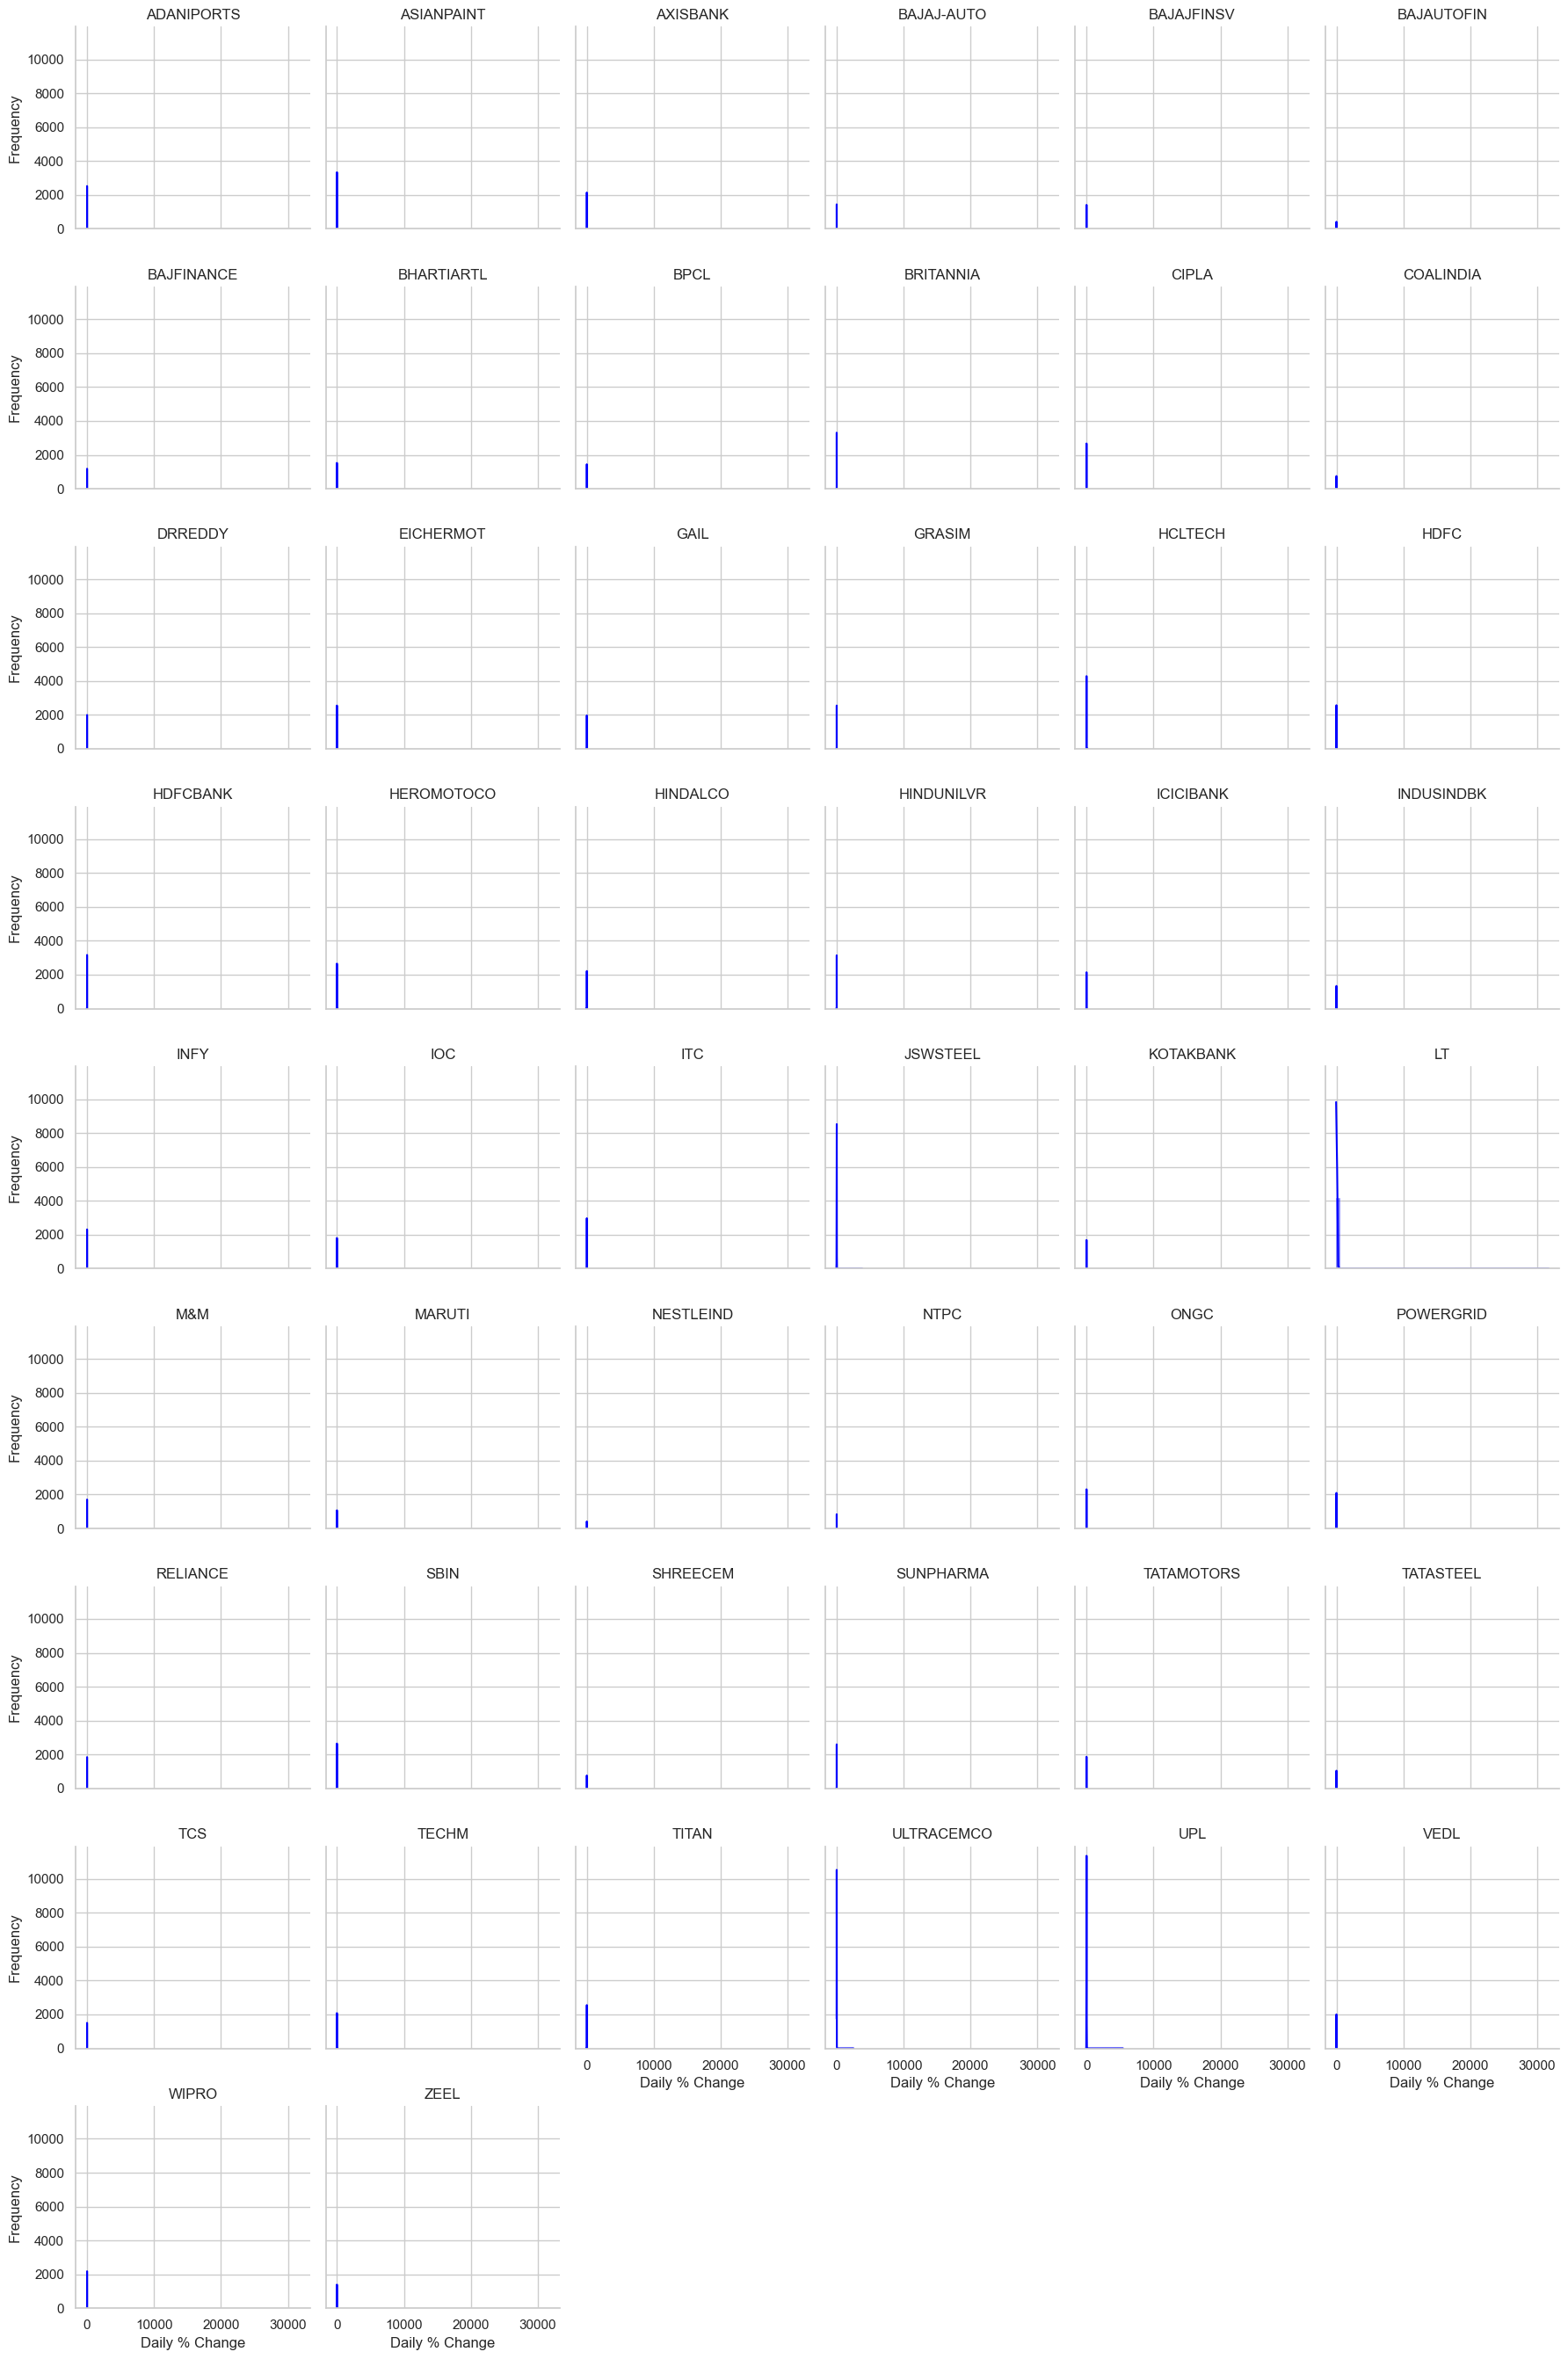

In [21]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a facet grid for visualizing daily percentage change for each symbol
g = sns.FacetGrid(NIFTY50, col="Symbol", col_wrap=6, height=3)  # Adjust col_wrap to control number of columns per row
g.map(sns.histplot, 'Daily % Change', bins=50, kde=True, color='blue')

# Set the titles and axis labels
g.set_axis_labels("Daily % Change", "Frequency")
g.set_titles("{col_name}")

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()

In [22]:
volatility = NIFTY50.groupby('Symbol')['Daily % Change'].std().reset_index()
volatility.columns = ['Symbol', 'Volatility']
top_volatile_stocks = volatility.sort_values(by='Volatility', ascending=False).head(10)


In [23]:
top_volatile_stocks #Display the top 10 volatile stocks

,Symbol,Volatility
29,LT,490.043271
46,UPL,83.107803
27,JSWSTEEL,60.240841
45,ULTRACEMCO,38.940324
16,HCLTECH,3.987178
0,ADANIPORTS,3.669907
47,VEDL,3.581967
49,ZEEL,3.314002
5,BAJAUTOFIN,3.189612
28,KOTAKBANK,3.157058


In [24]:
top_volatile_stocks.isnull().sum()

Symbol        0
Volatility    0
dtype: int64

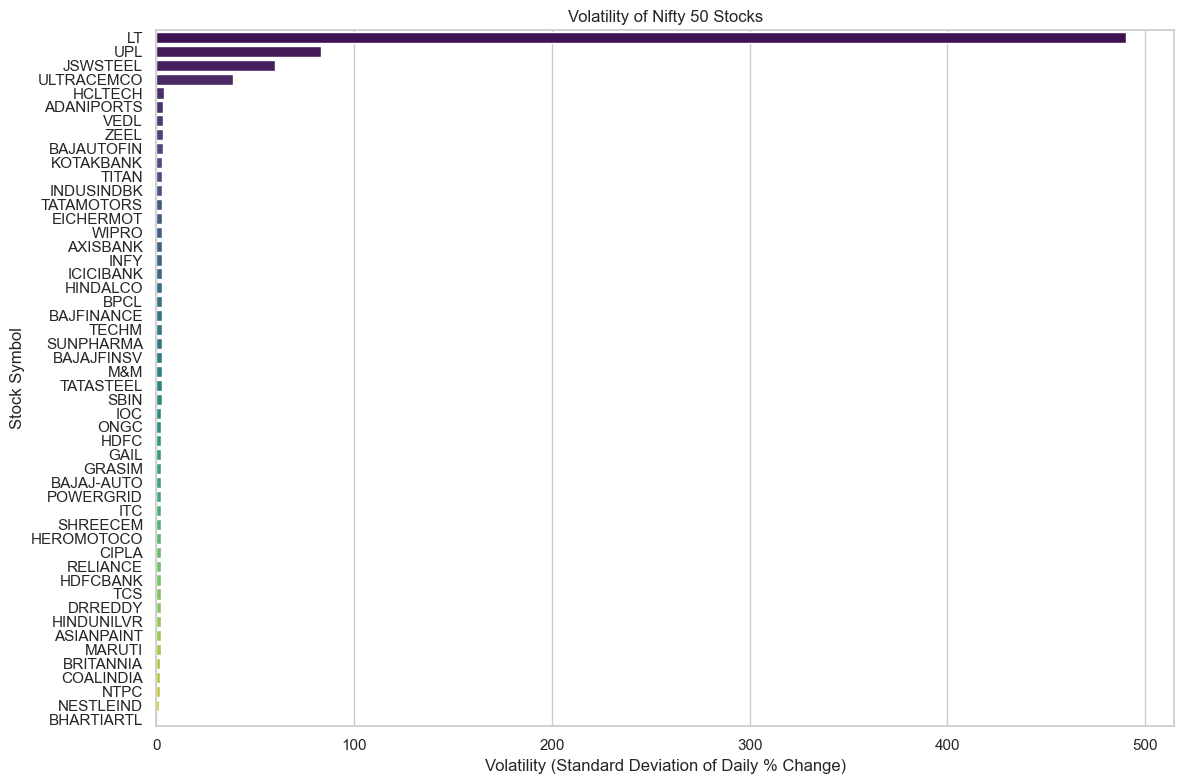

In [25]:
#Visualize the volatility of each stock , LT is the most volatile
# Sort by volatility in descending order
volatility_sorted = volatility.sort_values(by='Volatility', ascending=False)

# Create a bar plot to visualize the volatility
plt.figure(figsize=(12, 8))
sns.barplot(x='Volatility', y='Symbol', data=volatility_sorted, palette='viridis')

# Set plot labels and title
plt.xlabel('Volatility (Standard Deviation of Daily % Change)')
plt.ylabel('Stock Symbol')
plt.title('Volatility of Nifty 50 Stocks')

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
#select the promising stocks 
filtered_data = NIFTY50.groupby('Symbol').agg({
    'Daily % Change': ['mean', 'std'],
    'Volume': 'mean',
    'Deliverable Volume': 'mean'
}).reset_index()
filtered_data.columns = ['Symbol', 'Mean Return', 'Volatility', 'Avg Volume', 'Avg Deliverable Volume']

In [27]:
#Promising stocks based on volatility and returns
promising_stocks1 = filtered_data[(filtered_data['Volatility'] < 2.2) & (filtered_data['Mean Return'] > 0)]
promising_stocks1

,Symbol,Mean Return,Volatility,Avg Volume,Avg Deliverable Volume
9,BRITANNIA,0.061226,2.116975,1.220883e+05,6.217827e+04
32,NESTLEIND,0.078262,1.525904,5.449900e+04,3.357436e+04
33,NTPC,0.030906,1.932117,7.226587e+06,3.865508e+06


In [28]:

#Promising stocks based on returns
promising_stocks2 = filtered_data[(filtered_data['Mean Return'] > 0.1)]

# Get the top 5 promising stocks based on 'Mean Return'
top_5_promising_stocks = promising_stocks2.nlargest(5, 'Mean Return')
top_5_promising_stocks.dropna(inplace=True)
# Display the top 5 promising stocks
top_5_promising_stocks

,Symbol,Mean Return,Volatility,Avg Volume,Avg Deliverable Volume
29,LT,7.630902,490.043271,1.917127e+06,894649.779876
46,UPL,1.327430,83.107803,1.692215e+06,705451.742011
27,JSWSTEEL,1.046127,60.240841,2.680639e+06,640909.711818
45,ULTRACEMCO,0.703116,38.940324,2.476179e+05,139015.523188


In [29]:
import scipy.stats as stats
import numpy as np

# 1. Define volatility thresholds (for example, top 50% as high volatility and bottom 50% as low volatility)
volatility_threshold = volatility['Volatility'].median()

# Add a new column to classify stocks into high or low volatility
volatility['Volatility Group'] = np.where(volatility['Volatility'] >= volatility_threshold, 'High Volatility', 'Low Volatility')

# 2. Merge the volatility data back to the main dataframe
filtered_data = pd.merge(filtered_data, volatility[['Symbol', 'Volatility Group']], on='Symbol', how='left')

# 3. Perform t-test for each feature
features = ['Mean Return', 'Avg Volume', 'Avg Deliverable Volume']  # List of features to test
p_values = {}

for feature in features:
    # Separate the data into high and low volatility groups
    high_volatility_group = filtered_data[filtered_data['Volatility Group'] == 'High Volatility'][feature]
    low_volatility_group = filtered_data[filtered_data['Volatility Group'] == 'Low Volatility'][feature]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(high_volatility_group, low_volatility_group)
    
    # Store the p-value for each feature
    p_values[feature] = p_value

# 4. Display the p-values for each feature
print("P-values for features associated with volatility:")
for feature, p_value in p_values.items():
    print(f"{feature}: {p_value}")
    
# 5. Interpretation of p-values
significant_features = [feature for feature, p_value in p_values.items() if p_value < 0.05]
print("\nFeatures with statistically significant differences (p-value < 0.05):")
print(significant_features)


P-values for features associated with volatility:
Mean Return: nan
Avg Volume: 0.7205802581179959
Avg Deliverable Volume: 0.2488847509536099

Features with statistically significant differences (p-value < 0.05):
[]


# Model Building

In [30]:
NIFTY50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Deliverable Volume  235192 non-null  float64
 13  %Deliverble         235192 non-null  float64
 14  Company Name        232581 non-null  object 
 15  Industry            232581 non-nul

In [31]:
NIFTY50.dropna(inplace=True)

In [32]:
# Assuming your DataFrame is named 'NIFTY50' and the column to convert is 'Date'
NIFTY50['Date'] = pd.to_datetime(NIFTY50['Date'], errors='coerce')

# Check the type after conversion
NIFTY50['Date'].dtype


dtype('<M8[ns]')

In [33]:
#Feature Engineering for Machine Learning
NIFTY50['Month'] = NIFTY50['Date'].dt.month
NIFTY50['Year'] = NIFTY50['Date'].dt.year
features = ['Open', 'High', 'Low', 'Volume', 'Deliverable Volume', 'Month', 'Year']
target = 'Close'

In [34]:

# Train-test split
X = NIFTY50[features]
y = NIFTY50[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
#Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")



Model Performance:
R^2 Score: 0.9998973081768731
RMSE: 26.703954136868315


In [36]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(feature_importance)



Feature Importance:
              Feature  Importance
1                High    0.924635
2                 Low    0.075299
0                Open    0.000036
3              Volume    0.000011
4  Deliverable Volume    0.000009
5               Month    0.000006
6                Year    0.000004


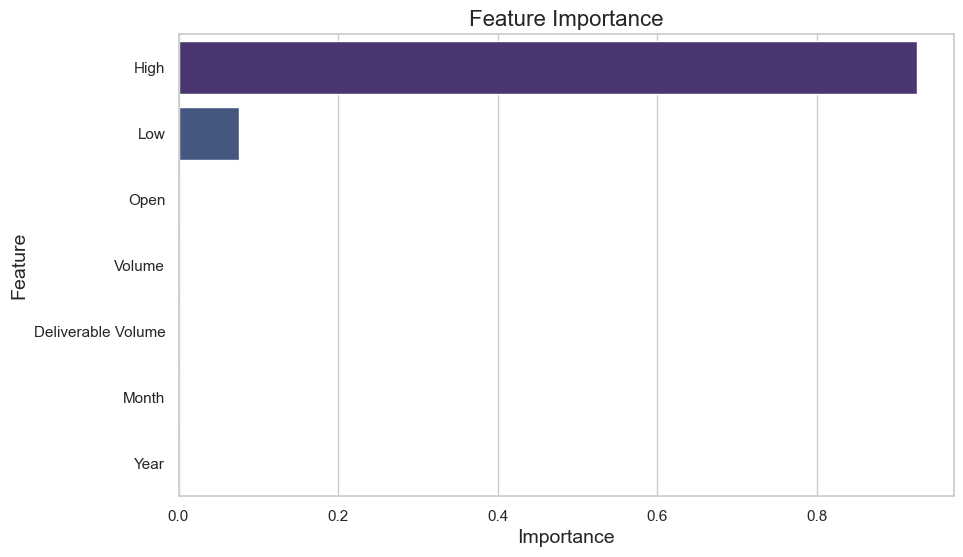

In [37]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

# Adding title and labels
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


# DASHBOARD TO VISUALIZE STOCK PERFORMANCE

In [38]:
#Dashboard for Stock Analysis
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Nifty 50 Stock Analysis Dashboard"),
    dcc.Dropdown(
        id='stock-selector',
        options=[{'label': symbol, 'value': symbol} for symbol in NIFTY50['Symbol'].unique()],
        value='ADANIPORTS',
        multi=False
    ),
    dcc.Graph(id='stock-price-chart'),
    dcc.Graph(id='volatility-chart')
])

@app.callback(
    [Output('stock-price-chart', 'figure'),
     Output('volatility-chart', 'figure')],
    [Input('stock-selector', 'value')]
)
def update_dashboard(stock):
    filtered_data = NIFTY50[NIFTY50['Symbol'] == stock]

    price_fig = px.line(filtered_data, x='Date', y='Close', title=f"{stock} Price Over Time")
    vol_fig = px.line(filtered_data, x='Date', y='Daily % Change', title=f"{stock} Volatility Over Time")

    return price_fig, vol_fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [73]:
#Dashboard for Stock Analysis
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Nifty 50 Stock Analysis Dashboard"),
    dcc.Dropdown(
        id='stock-selector',
        options=[{'label': symbol, 'value': symbol} for symbol in NIFTY50['Symbol'].unique()],
        value='NESTLEIND',
        multi=False
    ),
    dcc.Graph(id='stock-price-chart'),
    dcc.Graph(id='volatility-chart')
])

@app.callback(
    [Output('stock-price-chart', 'figure'),
     Output('volatility-chart', 'figure')],
    [Input('stock-selector', 'value')]
)
def update_dashboard(stock):
    filtered_data = NIFTY50[NIFTY50['Symbol'] == stock]

    price_fig = px.line(filtered_data, x='Date', y='Close', title=f"{stock} Price Over Time")
    vol_fig = px.line(filtered_data, x='Date', y='Daily % Change', title=f"{stock} Volatility Over Time")

    return price_fig, vol_fig

if __name__ == '__main__':
    app.run_server(debug=True)

c:\Users\adeye\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\adeye\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\adeye\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\adeye\anaconda3\Lib\si